# Data visualization basics with Matplotlib


To complete your homework, you must use the `vgsales.csv` dataset, the download of which will be given below. This dataset contains information about the total sales of video games for video game consoles. Description of signs:
* `Rank` - the sequence number of the record in the dataset
* `Name` - game name
* `Platform` - the platform for which the game was released (Nintendo, PlayStation, XBox, etc.)
* `Year` - game release year
* `Genre` - game genre
* `Publisher` - the name of the game publisher
* `NA_Sales` - sales of the game in North America, million copies
* `EU_Sales` - sales of the game in Europe, million copies
* `JP_Sales` - sales of the game in Japan, million copies
* `Other_Sales` - sales of the game in other countries, million copies
* `Global_Sales` - game sales worldwide, million copies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###  1

Plot a histogram of the distribution of sales of all games in Japan


([<matplotlib.axis.XTick at 0x20f2b539340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

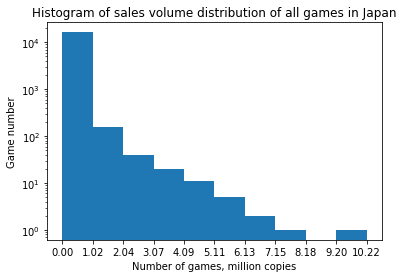

In [4]:
### YOUR CODE HERE ###
jp_val = df['JP_Sales']
bin_width = jp_val.max() / 10
x_range = [i * bin_width for i in range(11)]
plt.hist(jp_val, log=True)
plt.title('Histogram of sales volume distribution of all games in Japan')
plt.xlabel('Number of games, million copies')
plt.ylabel('Game number')
plt.xticks(x_range)


###  2

Build a barchart that compares the worldwide sales of "Grand Theft Auto V" across platforms


Text(0, 0.5, 'Global Game Sales')

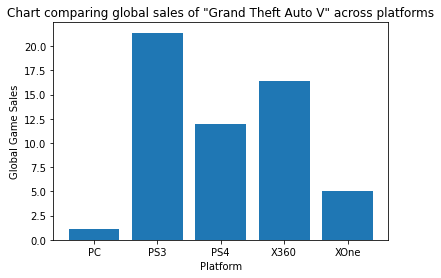

In [5]:
### YOUR CODE HERE ###
series = df[df['Name'] == 'Grand Theft Auto V'].groupby('Platform')['Global_Sales'].sum().reset_index()
plt.bar(series['Platform'], series['Global_Sales'])
plt.title('Chart comparing global sales of "Grand Theft Auto V" across platforms')
plt.xlabel('Platform')
plt.ylabel('Global Game Sales')

###  3

Build a line graph of the dynamics of the total worldwide sales of all games by year


Text(0, 0.5, 'Global Game Sales')

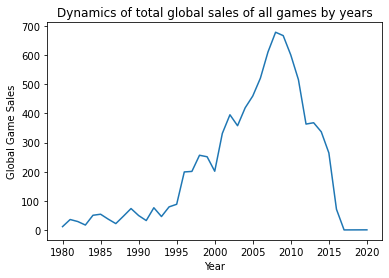

In [6]:
### YOUR CODE HERE ###
series1 = df.groupby('Year')['Global_Sales'].sum()
plt.plot(series1)
plt.title('Dynamics of total global sales of all games by years')
plt.xlabel('Year')
plt.ylabel('Global Game Sales')

###  4

Plot a scatter plot showing the relationship between worldwide sales and North American sales.


Text(0, 0.5, 'Sales in North America')

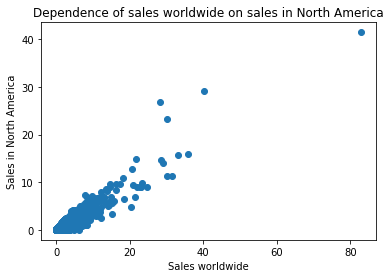

In [7]:
plt.scatter(df['Global_Sales'], df['NA_Sales'])
plt.title('Dependence of sales worldwide on sales in North America')
plt.xlabel('Sales worldwide')
plt.ylabel('Sales in North America')
# plt.legend()

###  5

Construct a pie chart of the percentage of sales of the game "Super Mario Bros." on different platforms around the world. Sign the shares of the graph with an accuracy of 1 decimal place.


Text(0.5, 1.0, 'Sales ratio chart for "Super Mario Bros." on different platforms around the world')

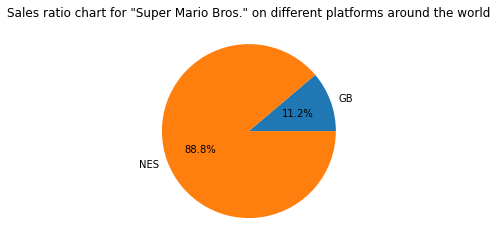

In [8]:
series2 = df[df['Name'] == 'Super Mario Bros.'].groupby('Platform')['Global_Sales'].sum()
plt.pie(series2, labels=series2.index, autopct='%1.1f%%')
plt.title('Sales ratio chart for "Super Mario Bros." on different platforms around the world')

###  6

Identify the top 5 publishers with the highest total global sales in 2013 and illustrate their sales with a bar graph


              Publisher  Global_Sales
0       Electronic Arts         52.92
1              Nintendo         52.79
2  Take-Two Interactive         52.41
3            Activision         43.49
4               Ubisoft         27.39


Text(0, 0.5, 'Sales, million copies')

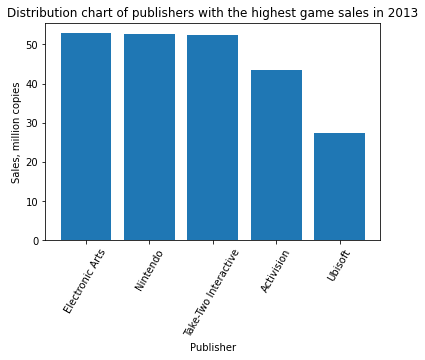

In [9]:
series3 = df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum()
sorted_ser3 = series3.sort_values(ascending=False).reset_index().head()
print(sorted_ser3)
plt.bar(sorted_ser3['Publisher'], sorted_ser3['Global_Sales'])
plt.title('Distribution chart of publishers with the highest game sales in 2013')
plt.xticks(rotation= 60)
plt.xlabel('Publisher')
plt.ylabel('Sales, million copies')

###  7

Plot a histogram of the distribution of global non-Nintendo game sales between 2000 and 2015, inclusive. The histogram for greater accuracy should contain 20 columns, cutoffs on the x-axis should correspond to the boundaries of the columns.


       index  Global_Sales
0         15         21.82
1         16         21.40
2         17         20.81
3         23         16.38
4         24         16.15
...      ...           ...
13485  16593          0.01
13486  16594          0.01
13487  16595          0.01
13488  16596          0.01
13489  16597          0.01

[13490 rows x 2 columns]


Text(0, 0.5, 'Game number')

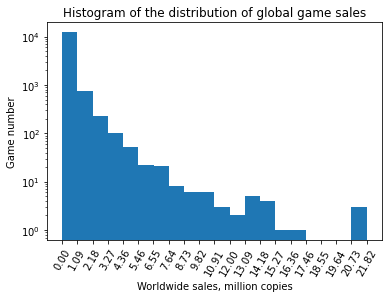

In [10]:
series4 = df[(df['Publisher'] != 'Nintendo') & ((df['Year'] >= 2000) & (df['Year'] <= 2015))]['Global_Sales'].reset_index()
print(series4)

bins_width = series4['Global_Sales'].max() / 20
range_x = [i * bins_width for i in range(21)]

plt.hist(series4['Global_Sales'], bins=20, log=True)
plt.xticks(range_x, rotation=60)
plt.title('Histogram of the distribution of global game sales')
plt.xlabel('Worldwide sales, million copies')
plt.ylabel('Game number')

###  8

Build a line graph of the dynamics of the total world sales of games of the genre "Action" by year


Year
1980.0      0.34
1981.0     14.84
1982.0      6.52
1983.0      2.86
1984.0      1.85
1985.0      3.52
1986.0     13.74
1987.0      1.12
1988.0      1.75
1989.0      4.64
1990.0      6.39
1991.0      6.76
1992.0      3.83
1993.0      1.81
1994.0      1.55
1995.0      3.57
1996.0     20.58
1997.0     27.58
1998.0     39.44
1999.0     27.78
2000.0     34.04
2001.0     59.39
2002.0     86.77
2003.0     67.93
2004.0     76.26
2005.0     85.69
2006.0     66.58
2007.0    106.50
2008.0    136.39
2009.0    139.36
2010.0    117.64
2011.0    118.96
2012.0    122.04
2013.0    125.22
2014.0     99.02
2015.0     70.70
2016.0     19.91
2017.0      0.01
Name: Global_Sales, dtype: float64


Text(0, 0.5, 'Worldwide sales, million copies')

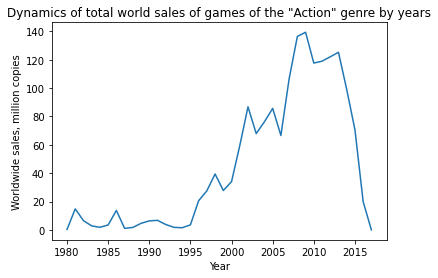

In [11]:
series5 = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].sum()
print(series5)

plt.plot(series5)
plt.title('Dynamics of total world sales of games of the "Action" genre by years')
plt.xlabel('Year')
plt.ylabel('Worldwide sales, million copies')

###  9

Use a bar chart to illustrate the all-time sales of all games by publisher "Microsoft Game Studios" in North America by genre. Arrange columns in descending order.


           Genre  NA_Sales
8        Shooter     64.65
3           Misc     30.61
6         Racing     16.83
7   Role-Playing     12.79
10        Sports      9.69
0         Action      8.09
9     Simulation      7.10
11      Strategy      1.81
2       Fighting      1.68
1      Adventure      1.09
4       Platform      0.94
5         Puzzle      0.07


Text(0, 0.5, 'Sales in NA, million copies')

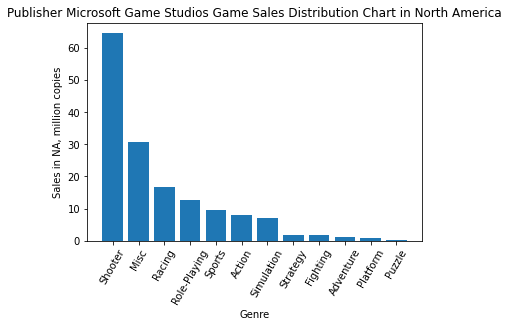

In [12]:
series6 = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre')['NA_Sales'].sum().reset_index()
sorted_ser6 = series6.sort_values('NA_Sales', ascending=False)
print(sorted_ser6)

plt.bar(sorted_ser6['Genre'], sorted_ser6['NA_Sales'])
plt.xticks(rotation=60)
plt.title('Publisher Microsoft Game Studios Game Sales Distribution Chart in North America')
plt.xlabel('Genre')
plt.ylabel('Sales in NA, million copies')

## Additional tasks

###  10

One of the main tasks in data analysis is to check the data for correctness and absence of errors. In the "vgsales" dataset, one potential source of error is the global sales column. In theory, the value of global sales of any game should be equal to the sum of sales in North America, Europe, Japan and other countries, otherwise we will get an error in the data, which can negatively affect the entire further analysis process.

There can be several reasons for this error. Let's look at the following reasons:
1. Rounding error. In general, such an error is quite common when converting values from one unit to another (for example, from thousands of copies to millions of copies).
2. Calculation error. This situation requires more serious research, as it can lead to unreliable results of data analysis.

We will assume that there is a summation error in the record if the sum of sales of any game in North America, Europe, Japan and other countries differs from the global sales by more than 0.01 million copies.

Use a pie chart to illustrate the percentage of records in the dataset that have this sales summation error.
* `Rank` - the sequence number of the record in the dataset
* `Name` - game name
* `Platform` - the platform for which the game was released (Nintendo, PlayStation, XBox, etc.)
* `Year` - game release year
* `Genre` - game genre
* `Publisher` - the name of the game publisher
* `NA_Sales` - sales of the game in North America, million copies
* `EU_Sales` - sales of the game in Europe, million copies
* `JP_Sales` - sales of the game in Japan, million copies
* `Other_Sales` - sales of the game in other countries, million copies
* `Global_Sales` - game sales worldwide, million copies

1    13973
0     2625
Name: compare, dtype: int64


Text(0.5, 1.0, 'Diagram of the ratio of erroneous data of world sales')

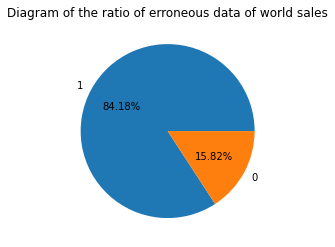

In [14]:
df['sum_values'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']


def compare(col):
    if abs(col['Global_Sales'] - col['sum_values']) > 0.01:
        return 0
    else:
        return 1


df['compare'] = df.apply(compare, axis=1)
df.to_csv('new_df.csv')

val_df = df['compare'].value_counts()
print(val_df)

plt.pie(val_df, labels=val_df.index, autopct='%1.2f%%')
plt.title('Diagram of the ratio of erroneous data of world sales')

